In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import statsmodels.api as smf
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

In [2]:
# read in data
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", sheet_name='Data')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# data summary 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

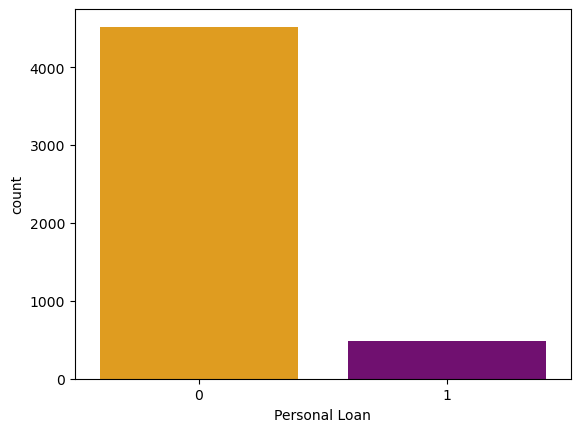

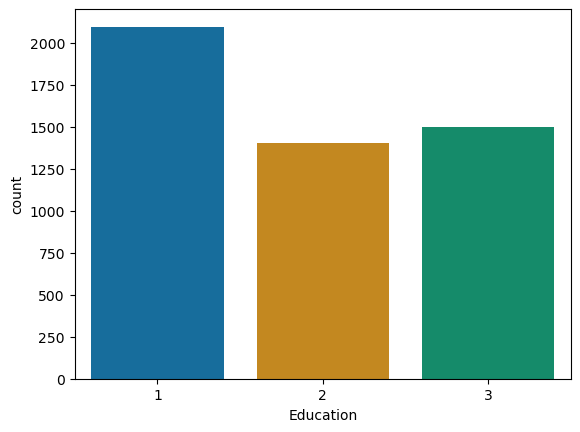

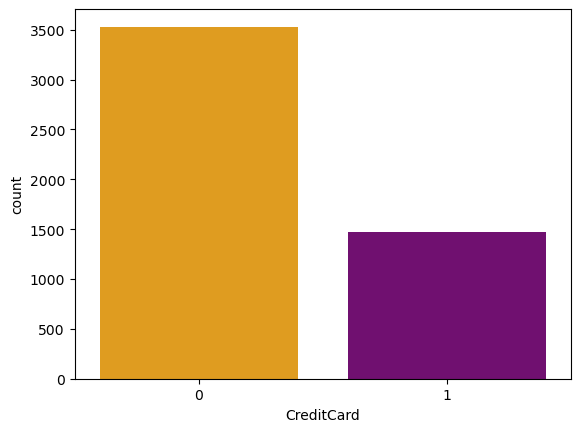

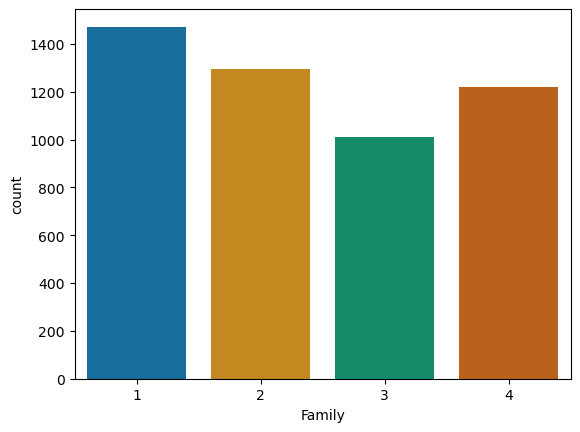

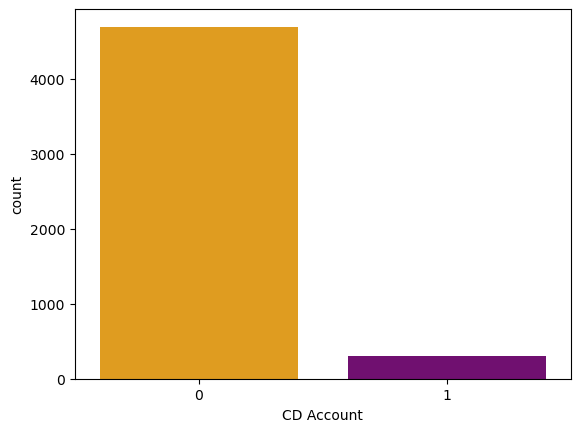

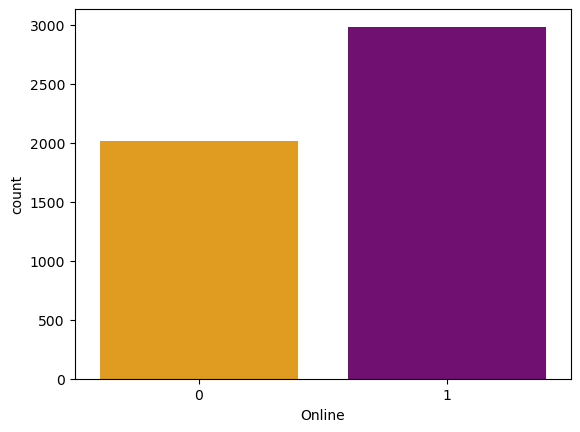

In [6]:
sns.countplot(data=df, x="Personal Loan", hue="Personal Loan", palette=['orange', 'purple'], legend=False)
plt.show()

sns.countplot(data=df, x="Education", hue="Education", palette='colorblind', legend=False)
plt.show()

sns.countplot(data=df, x="CreditCard", hue="CreditCard", palette=['orange', 'purple'], legend=False)
plt.show()

sns.countplot(data=df, x="Family", hue="Family", palette='colorblind', legend=False)
plt.show()

sns.countplot(data=df, x="CD Account", hue="CD Account", palette=['orange', 'purple'], legend=False)
plt.show()

sns.countplot(data=df, x="Online", hue="Online", palette=['orange', 'purple'], legend=False)
plt.show()

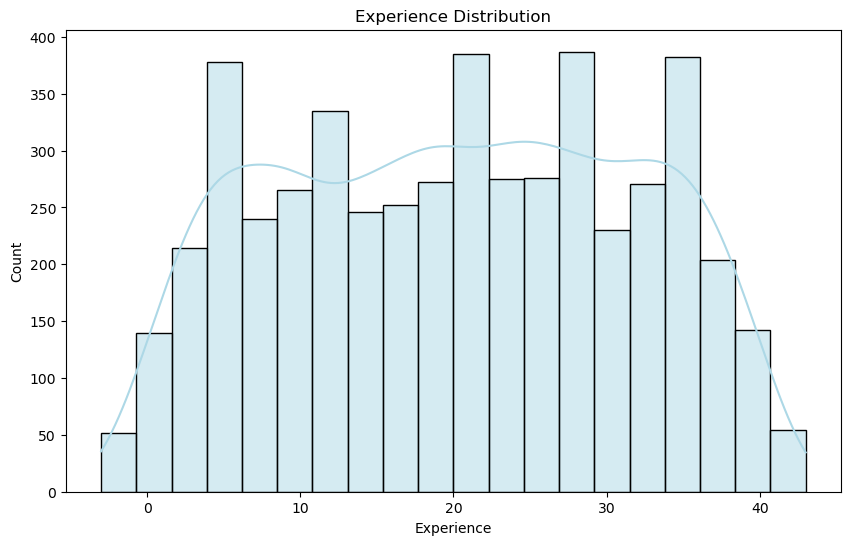

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Experience', bins=20, color='lightblue', kde=True)
plt.title('Experience Distribution')
plt.show()

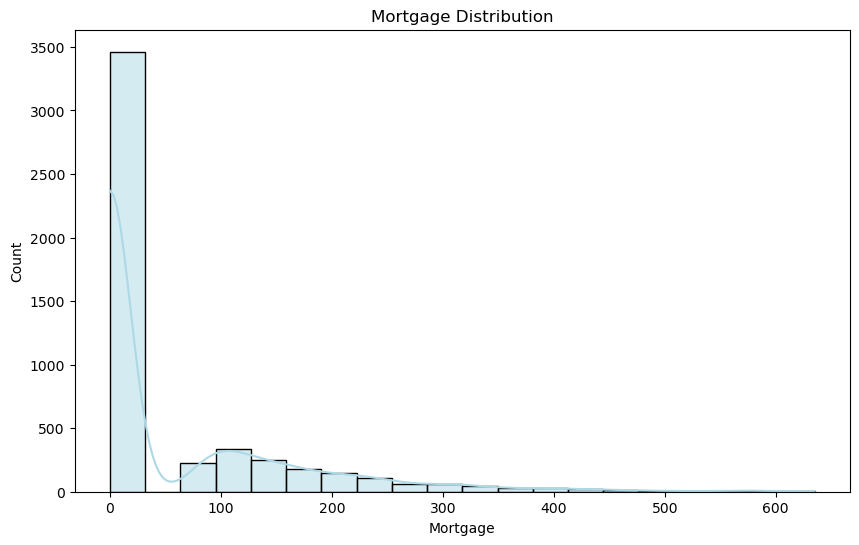

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Mortgage', bins=20, color='lightblue', kde=True)
plt.title('Mortgage Distribution')
plt.show()

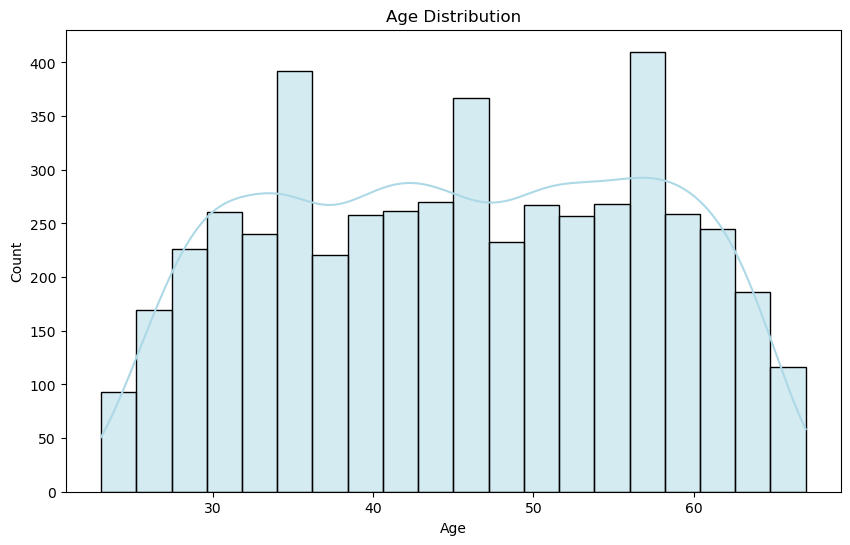

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, color='lightblue', kde=True)
plt.title('Age Distribution')
plt.show()

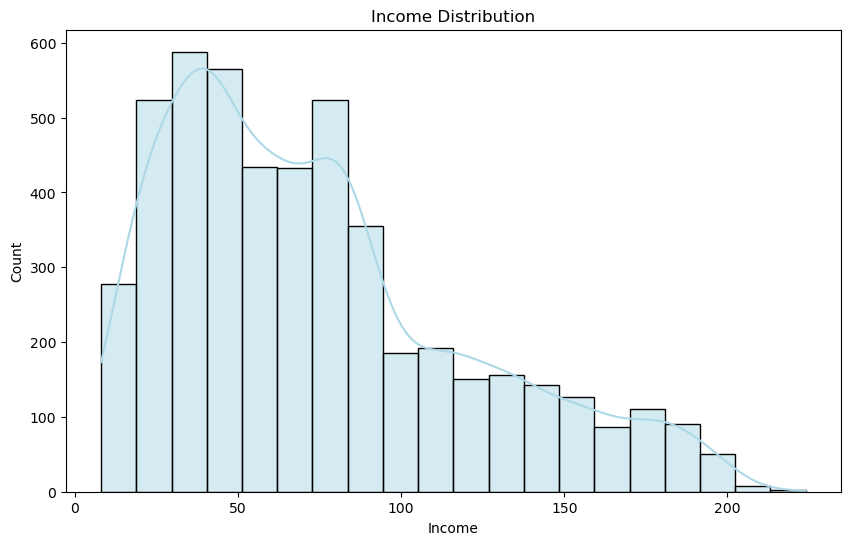

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Income', bins=20, color='lightblue', kde=True)
plt.title('Income Distribution')
plt.show()

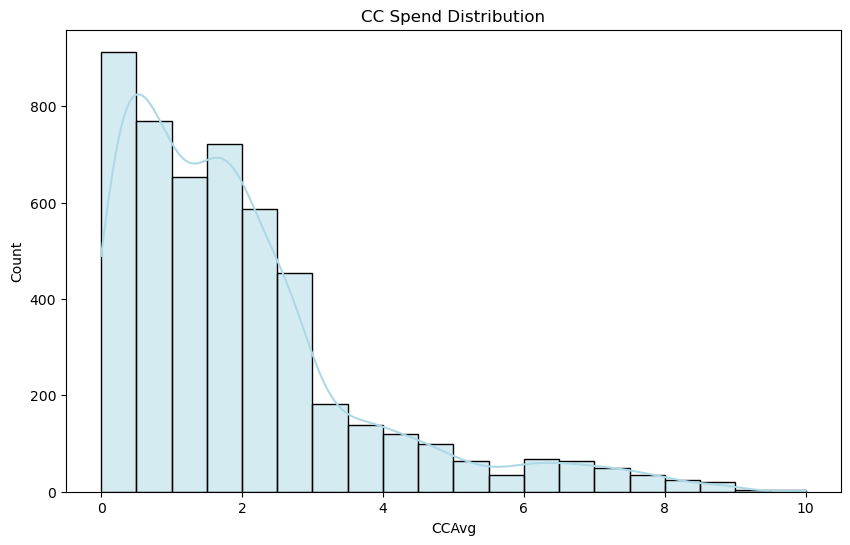

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CCAvg', bins=20, color='lightblue', kde=True)
plt.title('CC Spend Distribution')
plt.show()

In [12]:
df = df.drop(columns = ['ID'])

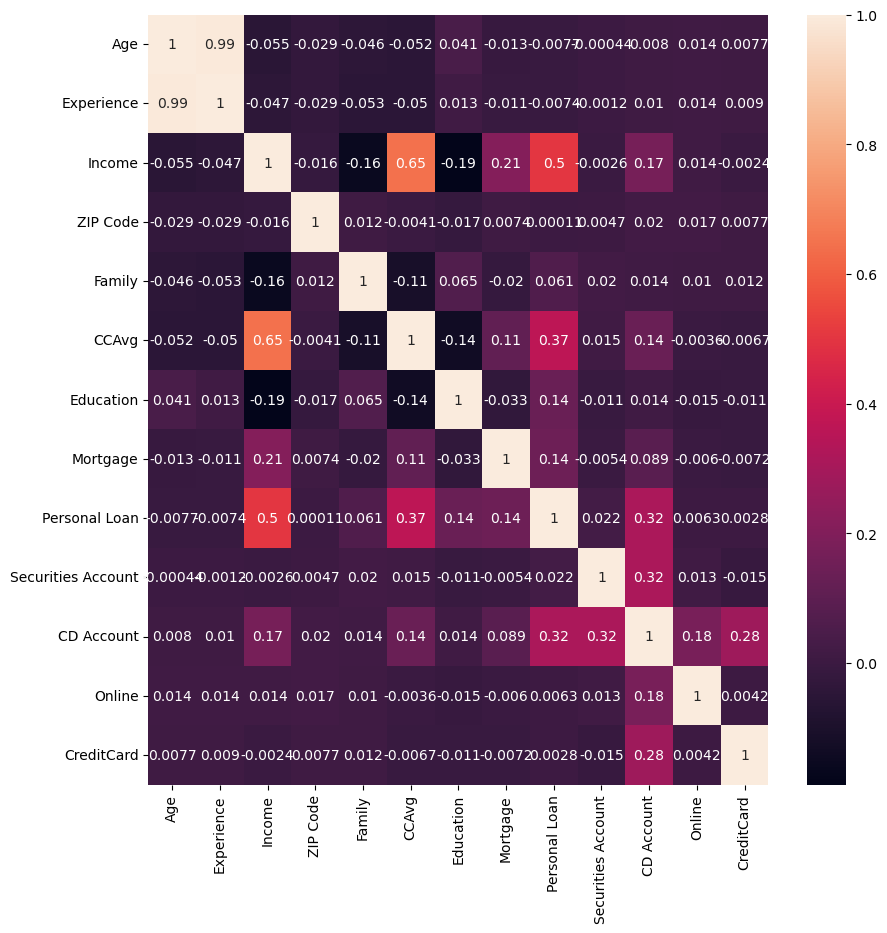

In [13]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.show()

In [14]:
# regression 
y=df['Personal Loan']
x=df.drop(columns=['Personal Loan'])
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2)
model = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, y_train)
print("Accuracy:", model.score(x_train, y_train))

Accuracy: 0.90775


In [22]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 4000 entries, 3437 to 3447
Series name: Personal Loan
Non-Null Count  Dtype
--------------  -----
4000 non-null   int64
dtypes: int64(1)
memory usage: 62.5 KB


In [15]:
y_pred=model.predict(x_test)

Confusion Matrix
[[876  28]
 [ 64  32]]


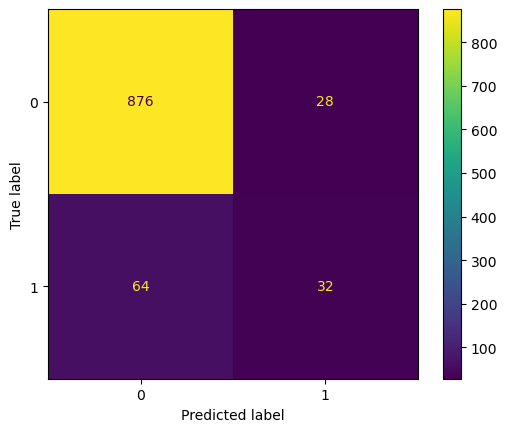

In [16]:
cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


In [17]:
cr=classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       904
           1       0.53      0.33      0.41        96

    accuracy                           0.91      1000
   macro avg       0.73      0.65      0.68      1000
weighted avg       0.89      0.91      0.90      1000



In [18]:
feature_names = x_train.columns
coefficients = model.coef_[0]
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print("Feature Coefficients (sorted by importance):")
print(coef_df)

Feature Coefficients (sorted by importance):
               Feature  Coefficient  Abs_Coefficient
2               Income     0.036802         0.036802
6            Education     0.016004         0.016004
4               Family     0.014061         0.014061
0                  Age     0.008797         0.008797
1           Experience     0.007826         0.007826
5                CCAvg     0.005413         0.005413
9           CD Account     0.004226         0.004226
7             Mortgage     0.000762         0.000762
8   Securities Account     0.000743         0.000743
3             ZIP Code    -0.000073         0.000073
10              Online    -0.000038         0.000038
11          CreditCard     0.000037         0.000037


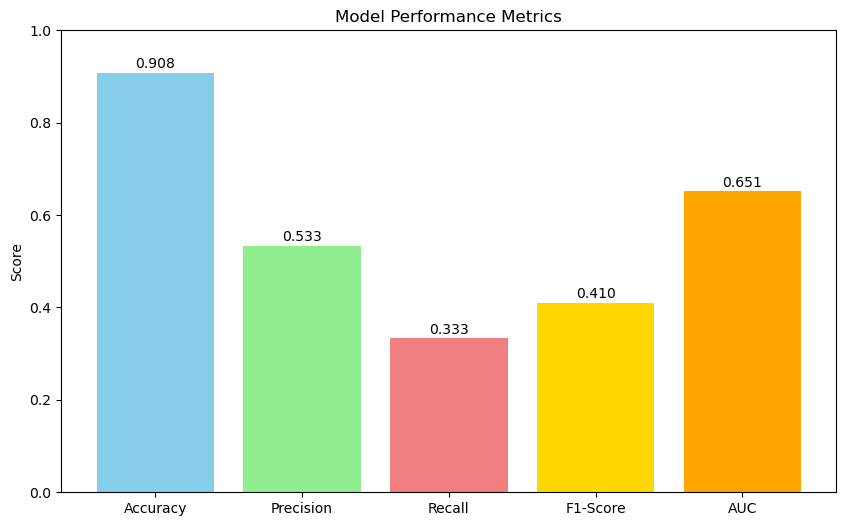

In [19]:
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
    'AUC': roc_auc_score(y_test, y_pred)
}

plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'orange'])
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.ylim(0, 1)
for i, (k, v) in enumerate(metrics.items()):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
plt.show()
